
# Plotting and Interpreting Soundings

We want to plot and interpret some soundings from radiosonde launches. For this, we use the Python package metpy (installation: pip3 install metpy). You can find information about the package here: https://unidata.github.io/MetPy/latest/index.html<br>
This exercise is adapted from the given example: https://unidata.github.io/MetPy/latest/examples/Advanced_Sounding.html#sphx-glr-examples-advanced-sounding-py


Some soundings are provided (via canvas). If you are interested in other locations or weather situations, you can download soundings from: https://weather.uwyo.edu/upperair/bufrraob.shtml


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from math import exp

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units
import metpy.constants as mpconst

## 0. Preparing the data
First, we read in the data into a panda dataframe:



In [3]:
name_sounding="Stavanger_2020010100UTC.txt" #you might change this

#the variables we are interested in
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed','theta', 'theta_e', 'theta_v']

#read in
df = pd.read_fwf(name_sounding,skiprows=6, usecols=[0, 1, 2, 3, 6, 7,8,9,10], names=col_names)

#drop NaNs
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'), how='all').reset_index(drop=True)

In [ ]:
df #looking into the data

We will pull the data out of the example dataset into individual variables and
assign units.



In [5]:
p = df['pressure'].values * units.hPa #pressure [hPa]
T = df['temperature'].values * units.degC #temperature [C]
Td = df['dewpoint'].values * units.degC #dew point temperature [C]
wind_speed = df['speed'].values * units.knots #wind speed [knots]
wind_dir = df['direction'].values * units.degrees #wind direction [degree]
u, v = mpcalc.wind_components(wind_speed, wind_dir) #calculating horizontal wind components

## 1. Plotting the Sounding in a Skew-T diagram 

Now, we want to plot the sounding. For this, we generate first an empty Skew-T diagram and then we plot temperature and dew point temperature.

- What do the lines in the Skew-T diagram represent and why are they relevant?
- What can you tell from the plotted sounding about the weather situation and the occurrence of clouds?

In [ ]:
#figure settings
fig = plt.figure(figsize=(15, 15))

#empty Skew-T diagram
skew = SkewT(fig, rotation=45)

#isotherm: slanted line at constant T -- in this case the 0
skew.ax.axvline(25, color='c', linestyle='--', linewidth=2)

#adding some lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#plotting the sounding data
skew.plot(p, T, 'r') #temperature
skew.plot(p, Td, 'g') #dew point temperature
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1040, 100)
skew.ax.set_xlim(-40, 60)

## 2. Parcel Theory: LCL, LFC, EL

Now, we use parcel theory to plot relevant levels for cloud formation.

- What is the height of the Lifting Condensation Level (LCL) in hPa and in m? What type of cloud would you expect?
- What is the height of the Level of Free Convection (LFC) in hPa and in m?
- What is the height of the Equilibrium Level (LCL) in hPa and in m?


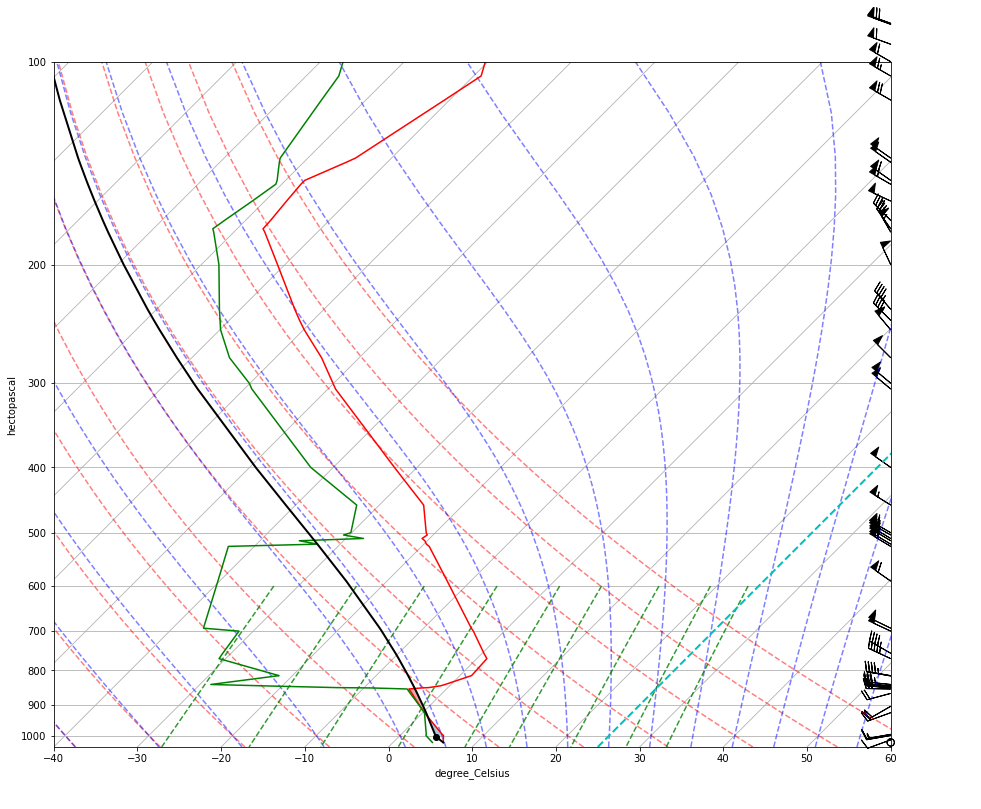

In [6]:
## showcase: LCL
#calculate and plot LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

#calculate and plot full parcel profile
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

## add LFC (mpcalc.lfc) and EL (mpcalc.el):
#...


#plt.show()

## 3. Parcel Theory: Convective Parameters

Now, we want to look on parameters describing convection.

- Based on your plots of LCL, LFC and EL, what can you say already about CAPE and CIN?
- How much CAPE and CIN do we have here (calculate it)?
- There are different types of CAPE. Recall them, explain their applicability and calculate them, as well.
- Interpretation of the sounding: What would you say about the potential of the development of showers/thunderstorms in the plotted sounding? If there is no potential, which ingredients are missing?

## 4. Moisture parameters
Now let us take a closer look at the humidity parameters.

- Calculate the partial pressure of vapor and dry air (respectively) and the mixing ratio at surface level (what do you need for this?).

In [ ]:
#defining some constants (list of available constants in MetPy: https://unidata.github.io/MetPy/latest/api/generated/metpy.constants.html)
l_v = mpconst.water_heat_vaporization
R_v = mpconst.Rv.to('J/K/kg')
R_d = mpconst.Rd
c_pl= mpconst.Cp_l.to('J/K/kg') #liquid water
c_pv= mpconst.Cp_v.to('J/K/kg') #water vapor
c_pd= mpconst.Cp_d #Dry air
epsilon = mpconst.epsilon

p_tot_surf = p[0].to('Pa')
T_surf = T[0].to('K')
Td_surf = Td[0].to('K')

## explicit calcution:
#Magnus equation
e_0 = 611*units('Pa')
A_L = 17.2
B_L = 36*units('K')
T_ice_point = 273.15*units('K')
p_0=100000*units('Pa')
e = e_0*exp(A_L*(Td_surf-T_ice_point)/(Td_surf-B_L))

#calculating the partial pressures:
#...

#calculating the mixing ratio:
#...

## inbuilt function:
#mpcalc.mixing_ratio(e,p_tot_surf),5) #compare it with the calcution above


## 5. (Virtual/Equivalent) Potential Temperature

Now we look at potential temperature.

- Calculate and plot (not necessarily in a Skew-T diagram) potential temperature, virtual potential temperature and equivalent potential temperature. How do their differences vary with height and how do they reflect the properties of the considered sounding?

In [ ]:
#check this:
df.loc[0]
df

## 6. Wetbulb (potential) temperature
Now we look at wet bulb temperature.
- Plot and calculate wet bulb (potential) temperature. How are they related?

In [ ]:
#calculating wetbulb temperature
T_wb = mpcalc.wet_bulb_temperature(p,T,Td).to(units.degC)
theta_wb = mpcalc.potential_temperature(p,T_wb).to(units.degC)

#plot them in a Skew-T diagram (and zoom in to see the differences)
#...

#maybe you want to add LCL again ;)

## 7. Vertical Stability and Lapse Rates

Now we look at vertical stability and lapse rates.

- Calculate and plot (here you can use again a normal plot) the dry and moist adiabatic lapse rates. Add also the virtual temperature. What can you say about vertical stability?

In [ ]:
#hints:
Tv = mpcalc.virtual_temperature(T,r_v)
gamma_d = mpcalc.dry_lapse(p,T)
gamma_s = mpcalc.moist_lapse(p,T)

#take a look at them
#e.g.: gamma_s[0], gamma_s[10]

#plot them
#...

In [18]:
## even more temperatures: saturated equivalent potential temperature, plot it as well, what does it say?
theta_es = mpcalc.saturation_equivalent_potential_temperature(p,T) 